<a href="https://colab.research.google.com/github/maneeshsagar/Redshift-Estimation-of-low-to-high-Redshift-of-Galaxy-and-Quasars/blob/main/Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#This program is to develop a neural Network(ANN) regression model . redshift the label/target
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import  MinMaxScaler

import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [ ]:
dataset = pd.read_csv("/content/gdrive/MyDrive/Dataset/dr16_train.csv")

In [ ]:
dataset.shape

(3651936, 28)

In [ ]:
dataset.loc[dataset.redshift<=1.00]

,objid,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroR50_r,petroR90_r,petroR50_z,petroR90_z,r,i,z,redshift,zerr,mmug,mmgr,mmri,mmiz,mfug,mfgr,mfri,mfiz
2,1.237680e+18,23.74654,23.19651,22.01303,20.80744,19.91660,24.60136,23.64122,22.48040,21.31004,20.34262,0.645596,1.295767,0.923503,2.043880,22.01303,20.80744,19.91660,0.814588,0.000212,23.471525,22.604770,21.410235,20.362020,24.121290,23.060810,21.895220,20.826330
8,1.237680e+18,22.18754,20.26853,18.66873,17.98356,17.62037,23.20970,21.22479,19.63727,18.96273,18.58847,1.641699,5.231110,1.148053,3.031853,18.66873,17.98356,17.62037,0.414405,0.000028,21.228035,19.468630,18.326145,17.801965,22.217245,20.431030,19.300000,18.775600
12,1.237680e+18,19.85871,19.78292,19.52230,19.55171,19.33732,20.18514,20.09453,19.86055,19.90843,19.63532,0.611777,1.311494,0.584768,1.259439,19.52230,19.55171,19.33732,0.949956,0.000157,19.820815,19.652610,19.537005,19.444515,20.139835,19.977540,19.884490,19.771875
15,1.237680e+18,20.89670,20.47772,20.32096,20.23001,19.98116,21.25896,20.76655,20.65870,20.54609,20.17305,0.575010,1.252485,0.655031,1.284499,20.32096,20.23001,19.98116,0.703552,0.000085,20.687210,20.399340,20.275485,20.105585,21.012755,20.712625,20.602395,20.359570
16,1.237680e+18,20.44421,20.43502,20.29807,20.28478,19.87277,20.77106,20.74594,20.66329,20.64881,20.01088,0.663572,1.540812,0.928312,2.238584,20.29807,20.28478,19.87277,0.918946,0.000792,20.439615,20.366545,20.291425,20.078775,20.758500,20.704615,20.656050,20.329845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651918,1.237680e+18,23.55071,22.16176,21.42934,20.33605,19.45292,23.36273,22.77520,22.04431,20.97781,20.16630,0.902360,1.541793,1.343559,3.721590,21.42934,20.33605,19.45292,0.821233,0.000099,22.856235,21.795550,20.882695,19.894485,23.068965,22.409755,21.511060,20.572055
3651919,1.237680e+18,21.86682,21.68359,21.37104,20.90272,20.47265,22.26036,22.02081,21.73457,21.26240,20.82135,0.718134,2.003701,0.557928,1.077190,21.37104,20.90272,20.47265,0.758018,0.000141,21.775205,21.527315,21.136880,20.687685,22.140585,21.877690,21.498485,21.041875
3651923,1.237680e+18,22.31663,21.52032,21.18740,20.69922,20.88031,22.85945,21.85250,21.58473,21.05252,21.36186,0.579885,1.189824,0.323276,0.451393,21.18740,20.69922,20.88031,0.872583,0.000315,21.918475,21.353860,20.943310,20.789765,22.355975,21.718615,21.318625,21.207190
3651924,1.237680e+18,26.08879,21.83270,21.34898,21.18016,21.19683,24.59543,22.18032,21.70586,21.61914,21.71572,0.763872,2.007011,0.652313,2.680450,21.34898,21.18016,21.19683,0.430104,0.000104,23.960745,21.590840,21.264570,21.188495,23.387875,21.943090,21.662500,21.667430


In [ ]:
dataset.head()

,objid,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroR50_r,petroR90_r,petroR50_z,petroR90_z,r,i,z,redshift,zerr,mmug,mmgr,mmri,mmiz,mfug,mfgr,mfri,mfiz
0,1.237680e+18,21.63269,21.27911,21.22550,20.95690,20.82752,22.05036,21.62439,21.64663,21.32027,21.40336,0.562805,1.068754,0.166565,0.238479,21.22550,20.95690,20.82752,1.839604,0.001146,21.455900,21.252305,21.091200,20.89221,21.837375,21.635510,21.48345,21.361815
1,1.237680e+18,19.74829,19.45819,19.33118,19.01371,18.80369,20.10190,19.79539,19.66580,19.35386,19.15471,0.631004,1.339584,0.602479,1.350725,19.33118,19.01371,18.80369,2.069321,0.000354,19.603240,19.394685,19.172445,18.90870,19.948645,19.730595,19.50983,19.254285
2,1.237680e+18,23.74654,23.19651,22.01303,20.80744,19.91660,24.60136,23.64122,22.48040,21.31004,20.34262,0.645596,1.295767,0.923503,2.043880,22.01303,20.80744,19.91660,0.814588,0.000212,23.471525,22.604770,21.410235,20.36202,24.121290,23.060810,21.89522,20.826330
3,1.237680e+18,20.63075,20.25426,20.04478,19.79378,19.70326,20.99431,20.60174,20.40031,20.19795,19.95800,0.657796,1.482055,0.764345,1.480650,20.04478,19.79378,19.70326,1.455912,0.000394,20.442505,20.149520,19.919280,19.74852,20.798025,20.501025,20.29913,20.077975
4,1.237680e+18,21.38126,21.13488,21.09993,20.92882,20.80634,21.85225,21.45860,21.45340,21.19782,20.63075,0.728897,2.212801,1.027675,1.458456,21.09993,20.92882,20.80634,1.651130,0.000760,21.258070,21.117405,21.014375,20.86758,21.655425,21.456000,21.32561,20.914285


In [ ]:
#these columns are not required
dataset.drop(['objid'], axis = 1,inplace=True) #dropping objid column
dataset.drop(['zerr'], axis = 1,inplace=True) #dropping zerr column

In [ ]:
dataset[dataset["modelMag_u"]==-9999]=np.nan
dataset[dataset["modelMag_g"]==-9999]=np.nan
dataset[dataset["modelMag_r"]==-9999]=np.nan
dataset[dataset["modelMag_i"]==-9999]=np.nan
dataset[dataset["modelMag_z"]==-9999]=np.nan
dataset[dataset["fiberMag_u"]==-9999]=np.nan
dataset[dataset["fiberMag_g"]==-9999]=np.nan
dataset[dataset["fiberMag_r"]==-9999]=np.nan
dataset[dataset["fiberMag_i"]==-9999]=np.nan
dataset[dataset["fiberMag_z"]==-9999]=np.nan
dataset[dataset["petroR50_r"]==-9999]=np.nan
dataset[dataset["petroR90_r"]==-9999]=np.nan
dataset[dataset["petroR50_z"]==-9999]=np.nan
dataset[dataset["petroR90_z"]==-9999]=np.nan
dataset[dataset["mmug"]==-9999]=np.nan
dataset[dataset["mmgr"]==-9999]=np.nan
dataset[dataset["mmri"]==-9999]=np.nan
dataset[dataset["mmiz"]==-9999]=np.nan
dataset[dataset["mfug"]==-9999]=np.nan
dataset[dataset["mfgr"]==-9999]=np.nan
dataset[dataset["mfri"]==-9999]=np.nan
dataset[dataset["mfiz"]==-9999]=np.nan
dataset[dataset["r"]==-9999]=np.nan
dataset[dataset["i"]==-9999]=np.nan
dataset[dataset["z"]==-9999]=np.nan
dataset[dataset["redshift"]==-9999]=np.nan
dataset[dataset["redshift"]<0]=np.nan

In [ ]:
#Dropping null values
dataset=dataset.dropna()
dataset.shape

(3548153, 26)

Text(0, 0.5, 'Number of samples')

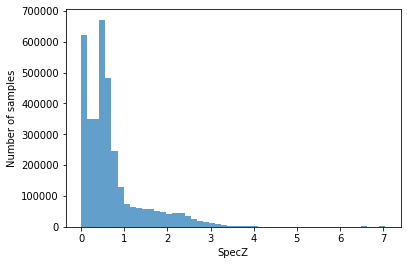

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
dataset['redshift'].value_counts(bins=10, sort=False) # counting data in a specified range based on redshift

(-0.00805, 0.705]    2474629
(0.705, 1.41]         574322
(1.41, 2.116]         254737
(2.116, 2.821]        173106
(2.821, 3.526]         49167
(3.526, 4.231]         10443
(4.231, 4.936]          2912
(4.936, 5.642]          2189
(5.642, 6.347]          2623
(6.347, 7.052]          4025
Name: redshift, dtype: int64

In [ ]:
def getClass(value):
  if value>=0.00 and value<1.0:
    return '1'
  elif value>=1.00 and value<2.0:
    return '2'
  elif value>=2.00 and value<3.0:
    return '3'
  elif value>=3.00 and value<4.0:
    return '4'
  elif value>=4.00 and value<5.0:
    return '5'
  elif value>=5.00 and value<6.0:
    return '6'
  elif value>=6.00 and value<=7.0:
    return '7'

In [ ]:
##dataset['Class']=dataset['redshift'].apply(lambda x: cls(x))
#dataset['Class']=dataset['redshift'].apply(lambda x: 0 if x<1.0 else 1)
dataset['Class']=dataset['redshift'].apply(lambda x: getClass(x))
dataset=dataset.dropna()
dataset.shape
#dataset.loc[dataset['redshift'] >0.00 , 'Class']='A'

(3547386, 27)

In [ ]:
dataset.Class.value_counts()

1    2858292
2     411157
3     226041
4      39072
5       4935
7       4465
6       3424
Name: Class, dtype: int64

In [ ]:
df_1=dataset[dataset.Class=='1']
df_2=dataset[dataset.Class=='2']
df_3=dataset[dataset.Class=='3']
df_4=dataset[dataset.Class=='4']
df_5=dataset[dataset.Class=='5']
df_6=dataset[dataset.Class=='6']
df_7=dataset[dataset.Class=='7']

In [ ]:
from sklearn.utils import resample
df_1=resample(df_1,replace=True,n_samples=513814,random_state=123) 
df_2=resample(df_2,replace=True,n_samples=513814,random_state=123) 
df_3=resample(df_3,replace=True,n_samples=513814,random_state=123) 
df_4=resample(df_4,replace=True,n_samples=513814,random_state=123) 
df_5=resample(df_5,replace=True,n_samples=513814,random_state=123) 
df_6=resample(df_6,replace=True,n_samples=513814,random_state=123) 
df_7=resample(df_7,replace=True,n_samples=513814,random_state=123) 
 

In [ ]:
dataset=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7])

In [ ]:
dataset.shape

(3596698, 27)

Text(0, 0.5, 'Number of samples')

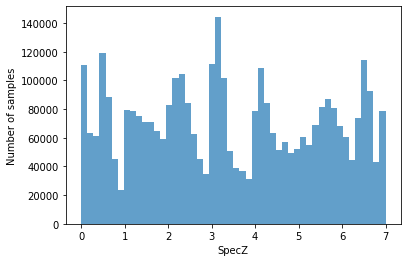

In [ ]:
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
del dataset['Class']

In [ ]:
X=dataset.drop('redshift',axis=1)
Y=dataset['redshift']

In [ ]:
Y.max()


6.999911

In [ ]:
Y.min()

0.0

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
X.shape

[[0.66375676 0.61197827 0.53750891 ... 0.70085862 0.55865358 0.60254633]
 [0.71891046 0.57464808 0.51587512 ... 0.66379014 0.53720943 0.57271676]
 [0.46209821 0.44245331 0.3741607  ... 0.45471058 0.36655347 0.42050882]
 ...
 [0.56130376 0.60101241 0.55881407 ... 0.7139768  0.63467415 0.69779779]
 [0.58673038 0.67529803 0.59342615 ... 0.7724896  0.62715715 0.65735433]
 [0.52469998 0.57536355 0.5584971  ... 0.65070576 0.59626463 0.66339623]]


(3596698, 25)

In [ ]:
# Target vector
y = dataset['redshift']
print(y)

982048     0.498486
356674     0.560501
36822      0.148298
1584991    0.074713
2492476    0.681300
             ...   
3635284    6.173983
1983692    6.549440
3512759    6.695148
564131     6.820958
2920048    6.139973
Name: redshift, Length: 3596698, dtype: float64


In [ ]:
y

982048     0.498486
356674     0.560501
36822      0.148298
1584991    0.074713
2492476    0.681300
             ...   
3635284    6.173983
1983692    6.549440
3512759    6.695148
564131     6.820958
2920048    6.139973
Name: redshift, Length: 3596698, dtype: float64

In [ ]:
y=y.to_numpy() #pd needs to convert to numpy before applying minmaxscaler
y=y.reshape(-1,1) # this is for using MinMAxscalerr
print(y.shape)

(3596698, 1)


In [ ]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
print(y)

[[0.07121319]
 [0.08007258]
 [0.02118568]
 ...
 [0.95646188]
 [0.97443496]
 [0.87715015]]


In [ ]:
#user dfined function for train,test and validation
def my_train_test_split(X, y, ratio_train, ratio_val, seed=42):
    idx = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(idx)

    limit_train = int(ratio_train * X.shape[0])
    limit_val = int((ratio_train + ratio_val) * X.shape[0])

    idx_train = idx[:limit_train]
    idx_val = idx[limit_train:limit_val]
    idx_test = idx[limit_val:]

    X_train, y_train = X[idx_train], y[idx_train]
    X_val, y_val = X[idx_val], y[idx_val]
    X_test, y_test = X[idx_test], y[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = my_train_test_split(X, y, .75,.15,seed=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(2697523, 25)
(539505, 25)
(359670, 25)
(2697523, 1)
(539505, 1)
(359670, 1)


In [ ]:
y_train=y_train.ravel()

In [ ]:
y_train.shape

(2697523,)

In [ ]:
#code for xtratree regressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
import timeit
start = timeit.default_timer()
model = ExtraTreesRegressor(n_estimators=50, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  


Time:  16.827047789483334 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.9923523713518858
Mean Absolute Error (best is 0.0): 0.006432421829877173
Mean Squared Error (best is 0.0): 0.0006700882832036021
R2 score (best is 1.0): 0.9921968742036995
root Mean Squared Error (best is 0.0): 0.025886063493772128


In [ ]:
y_pred_tree

array([0.93430705, 0.99516788, 0.59575037, ..., 0.69537384, 0.85295113,
       0.58018009])

In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  1.6303834070119831 %
Total rms:  0    0.025886
dtype: float64
rms w/o outliers 0    0.013326
dtype: float64
Bias:  0   -0.003654
dtype: float64
Bias(median value of delta z): -1.1102230246251565e-16
NMAD:  5.510970103487969e-06


In [ ]:
y_test_tree=scaler.inverse_transform(y_test_tree)


In [ ]:
y_pred_tree=scaler.inverse_transform(y_pred_tree)

In [ ]:
y_pred_tree

array([[6.54006617],
       [6.96608661],
       [4.17019958],
       ...,
       [4.867555  ],
       [5.970582  ],
       [4.061209  ]])

In [ ]:
y_test_tree

array([[6.540075],
       [6.966124],
       [4.169907],
       ...,
       [4.867555],
       [5.970582],
       [4.061209]])

Text(0, 0.5, 'Predicted')

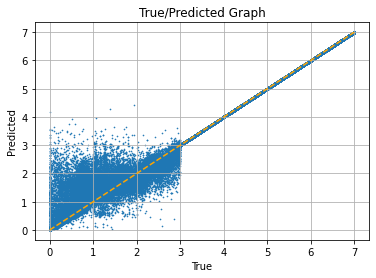

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

In [ ]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-cp37-none-any.whl size=8614 sha256=cae35e6e44e694f72fe2810c7ef1e48650f44332f77333077084d21cc56399af
  Stored in directory: /root/.cache/pip/wheels/8b/cb/fb/cbeba24d72e736b8987b7d0dc37afc0e76f3c16e544ceff727
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-cp37-none-any.whl size=7610 sha256=9c0f4ce1ecc22b260867dd3724e5fa4e37af745cbd1bc95aa72176d087e03e42
  Stored in directory: /root/.cache/pip/wheels/2a/62/31/d348320becc60729f508a2c5aad445b94d7543c5cb577cfb9d
  Created wheel for compress-json: filename=compress_json-1.0.4-cp37-none-any.whl size=4586 sha256=9c3da2fe375a7a06d6629ce70bc85125e5ae7d07f56643d030d3833408c2e5fc
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


Epoch 1/200
10538/10538 [==============================] - 37s 3ms/step - loss: 0.2144 - mae: 0.2144 - val_loss: 0.1529 - val_mae: 0.1529
Epoch 2/200
10538/10538 [==============================] - 34s 3ms/step - loss: 0.1570 - mae: 0.1570 - val_loss: 0.1487 - val_mae: 0.1487
Epoch 3/200
10538/10538 [==============================] - 34s 3ms/step - loss: 0.1537 - mae: 0.1537 - val_loss: 0.1470 - val_mae: 0.1470
Epoch 4/200
10538/10538 [==============================] - 33s 3ms/step - loss: 0.1524 - mae: 0.1524 - val_loss: 0.1458 - val_mae: 0.1458
Epoch 5/200
10538/10538 [==============================] - 33s 3ms/step - loss: 0.1511 - mae: 0.1511 - val_loss: 0.1455 - val_mae: 0.1455
Epoch 6/200
10538/10538 [==============================] - 33s 3ms/step - loss: 0.1499 - mae: 0.1499 - val_loss: 0.1447 - val_mae: 0.1447
Epoch 7/200
10538/10538 [==============================] - 32s 3ms/step - loss: 0.1489 - mae: 0.1489 - val_loss: 0.1414 - val_mae: 0.1414
Epoch 8/200
10538/10538 [=========

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd226cd1e50>,
       dtype=object))

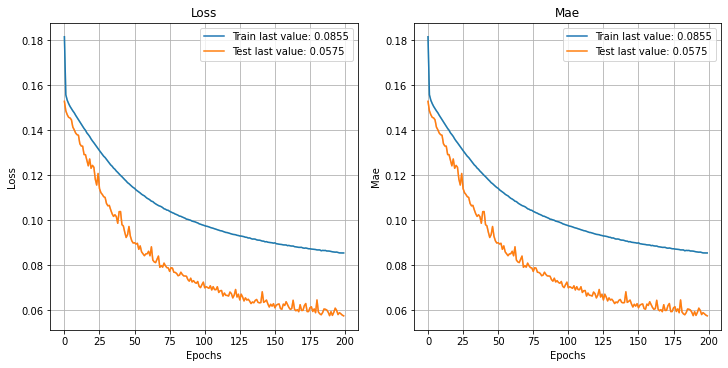

In [ ]:
import timeit
#from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.model_selection import cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from plot_keras_history import plot_history
from keras.layers import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

#with 1000 batchsize overfitting is much- RMS r2 are not good..256 batchsize was ok

model = Sequential()
# The Input Layer :
model.add(Dense(256, kernel_initializer='he_uniform',input_dim = 25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))
# The Hidden Layers :
model.add(Dense(912, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
opt=keras.optimizers.Adamax(lr=.001)
start = timeit.default_timer()
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mae'])
history= model.fit(X_train, y_train, batch_size=256, epochs =200, verbose=1,validation_data=(X_val, y_val)).history
model.summary()
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  
plot_history(history)

In [ ]:
import numpy as geek 
y_pred_ann=model.predict(X_test)
#print(y_pred)
out_arr = geek.column_stack((y_pred_ann, y_test)) #comparing two values
print ("Output stacked array:\n ", out_arr) 

Output stacked array:
  [[0.95972538 0.93430831]
 [0.97964358 0.99517322]
 [0.58917129 0.59570857]
 ...
 [0.69577467 0.69537384]
 [0.79759699 0.85295113]
 [0.54268479 0.58018009]]


In [ ]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_ann)
mae = metrics.mean_absolute_error(y_test, y_pred_ann)
mse = metrics.mean_squared_error(y_test, y_pred_ann)
r2 = metrics.r2_score(y_test, y_pred_ann)
rmse = sqrt(mean_squared_error(y_test, y_pred_ann))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)

Explained variance (best possible score is 1.0, lower values are worse): 0.7743113978177752
Mean Absolute Error (best is 0.0): 0.05716066432142311
Mean Squared Error (best is 0.0): 0.019627651296268322
R2 score (best is 1.0): 0.77143753145708
root Mean Squared Error (best is 0.0): 0.14009871982380254


In [ ]:
y_test_ann=y_test
y_test_ann=pd.DataFrame(y_test_ann)
y_pred_ann=pd.DataFrame(y_pred_ann)
outl=y_pred_ann[abs(y_test-y_pred_ann)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_ann-y_pred_ann)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_ann-y_pred_ann)[abs(y_test_ann-y_pred_ann)<0.1])**2)))
print('Bias: ', np.mean(y_test_ann-y_pred_ann))
print('Bias(median value of delta z):', np.median(y_test_ann-y_pred_ann))
plt.show()

delta_znorm=abs((y_test_ann-y_pred_ann)-np.median(y_pred_ann-y_test_ann)/(1+y_test_ann))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  12.011288125225901 %
Total rms:  0    0.140099
dtype: float64
rms w/o outliers 0    0.026571
dtype: float64
Bias:  0   -0.01571
dtype: float64
Bias(median value of delta z): -0.004164767973104604
NMAD:  0.023316773073038793


In [ ]:
y_test_ann=scaler.inverse_transform(y_test)

In [ ]:
y_pred_ann=scaler.inverse_transform(y_pred_ann)

Text(0, 0.5, 'Predicted')

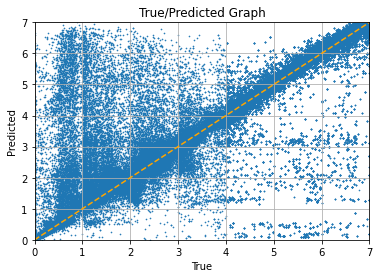

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(y_test_ann[:150000], y_pred_ann[:150000], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')